# Exp 3: Image Processing in Frequency Domain and Image Restoration #
## 1.	Aims ##

#### 1. Understand the basic principles of Discrete Fourier Transform, and learn how to perform FFT and IFFT with Python.

#### 2. Be familiar with the image processing methods in the frequency domain, using Python to perform frequency domain filtering.
    
#### 3. Master the basic principles of image restoration, and learn some image restoration algorithms in Python

## 2.	Steps and Requirements

### (1) FFT and IFFT.	
(a) Load the image rhino.jpg, convert it to grayscale.

(b) Perform FFT. Shift the DC component to the center, and show the phase angles and the magnitudes.

(c) Perform IFFT and show the reconstructed image (Tips: remember to shift the DC component back). 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figures.

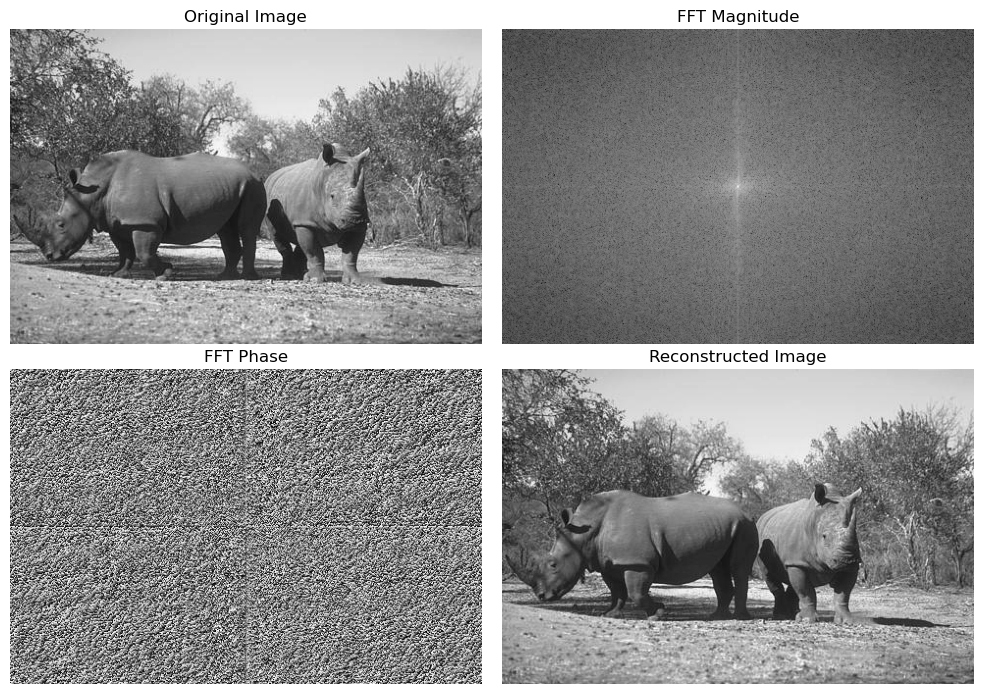

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\rhino.jpg", cv2.IMREAD_GRAYSCALE)

# Perform FFT
# 2D Fast Fourier Transform
fft = np.fft.fft2(image)
# Center the zero frequency component
fft_shift = np.fft.fftshift(fft)
# Log-scaled magnitude for visualization
magnitude = np.log(np.abs(fft_shift) + 1)# Add 1 for avoiding the mathematical issues
# Phase of the FFT
phase = np.angle(fft_shift)
# Reverse the centering of zero frequency
fft_ishift = np.fft.ifftshift(fft_shift)
# 2D Inverse fast fourier transform 
img_back = np.fft.ifft2(fft_ishift)
# Real prat of the complex output
img_back = np.abs(img_back)

# Plotting
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('FFT Magnitude')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(phase, cmap='gray')
plt.title('FFT Phase')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### (2) Ideal Lowpass Filtering.	
(a) Load the image rhino.jpg. Convert it to grayscale.

(b) Perform FFT. 

(c) Design an ideal lowpass filter.

(d) Perform frequency domain filtering with the ideal lowpass filter.

(e) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

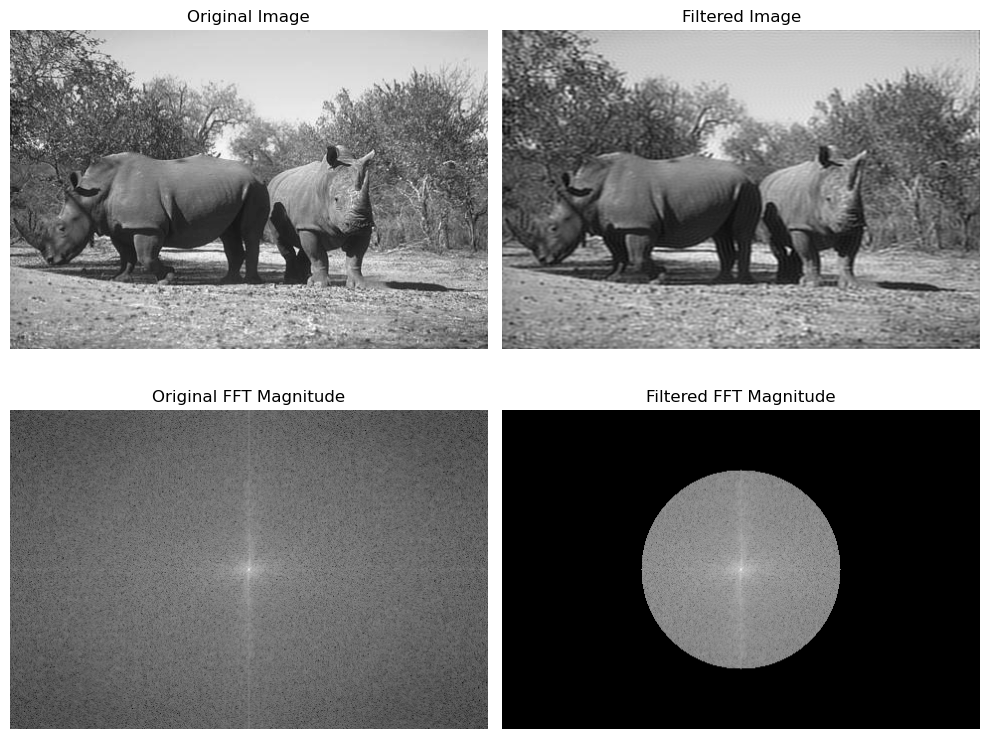

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image 
image = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\rhino.jpg", cv2.IMREAD_GRAYSCALE)

# FFT transformation and shift the zero frequency components to the center 
fft = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft)

# Log-scaled magnitude of the original FFT for visualization
magnitude_original = np.log(np.abs(fft_shift) + 1)

# Setting up the ideal lowpass filter 
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2 # Center of the image
radius = 100 # Define the radius of the low frequency pass core
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (center_col, center_row), radius, 1, thickness= -1) # Create circular mask for the lowpass filter 

# Apply the filter in the frequency domain
filtered_fft_shift = fft_shift * mask

# Log-scaled magnitude of the filtered FFT for visualization
magnitude_filtered = np.log(np.abs(filtered_fft_shift) + 1)

# IFFT to convert back to the spatial domain and obtain the filtered image 
fft_ishift = np.fft.ifftshift(filtered_fft_shift)
img_back = np.fft.ifft2(fft_ishift)
img_back = np.abs(img_back)

# Plotting the results in a single figure with subplots
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude_original, cmap='gray')
plt.title('Original FFT Magnitude')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_filtered, cmap='gray')
plt.title('Filtered FFT Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

### (3) Gaussian Lowpass Filter.	
(a) Load the image lena.jpg. Convert it to grayscale.

(b) Perform FFT.

(c) Perform Gaussian lowpass filtering.

(d) Display the original image, the filtered image, the original FFT magnitude, and filtered FFT magnitude in the same figure with sub-figures. Add the corresponding title to the sub-figure. Observe whether there is any ringing artifact in the filtered image. 

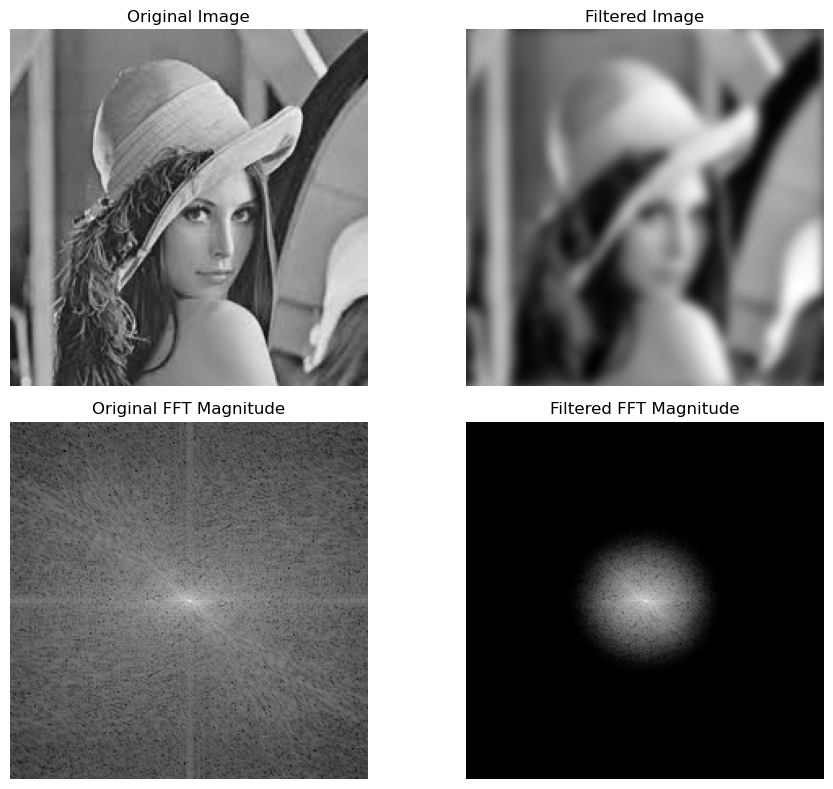

In [39]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\lena.jpg", cv2.IMREAD_GRAYSCALE)

# FFT transformation and shift the zero frequency components to the center 
fft = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft)

# Log-scaled magnitude of the original FFT for visualization
magnitude_original = np.log(np.abs(fft_shift) + 1)

# Setting up the Gaussian lowpass filter 
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
sigma = 30 # Standard deviation of the Gaussian filter
x = np.linspace(-center_col, center_col, cols)
y = np.linspace(-center_row, center_row, rows)
x, y = np.meshgrid(x, y) 
mask = np.exp(-((x**2 + y**2) / (2 * sigma ** 2)))

# Apply the Gaussian filter in the frequency domain
filtered_fft_shift = fft_shift * mask
magnitude_filtered  = np.log(np.abs(filtered_fft_shift) + 1)

# IFFT to convert back to the spatial domain and obtain the filtered image 
fft_ishift = np.fft.ifftshift(filtered_fft_shift)
img_back = np.fft.ifft2(fft_ishift)
img_back = np.abs(img_back)

# Plotting the results in a single figure with subplots
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude_original, cmap='gray')
plt.title('Original FFT Magnitude')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_filtered, cmap='gray')
plt.title('Filtered FFT Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

### (4) Butterworth Lowpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth lowpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$ are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth lowpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.


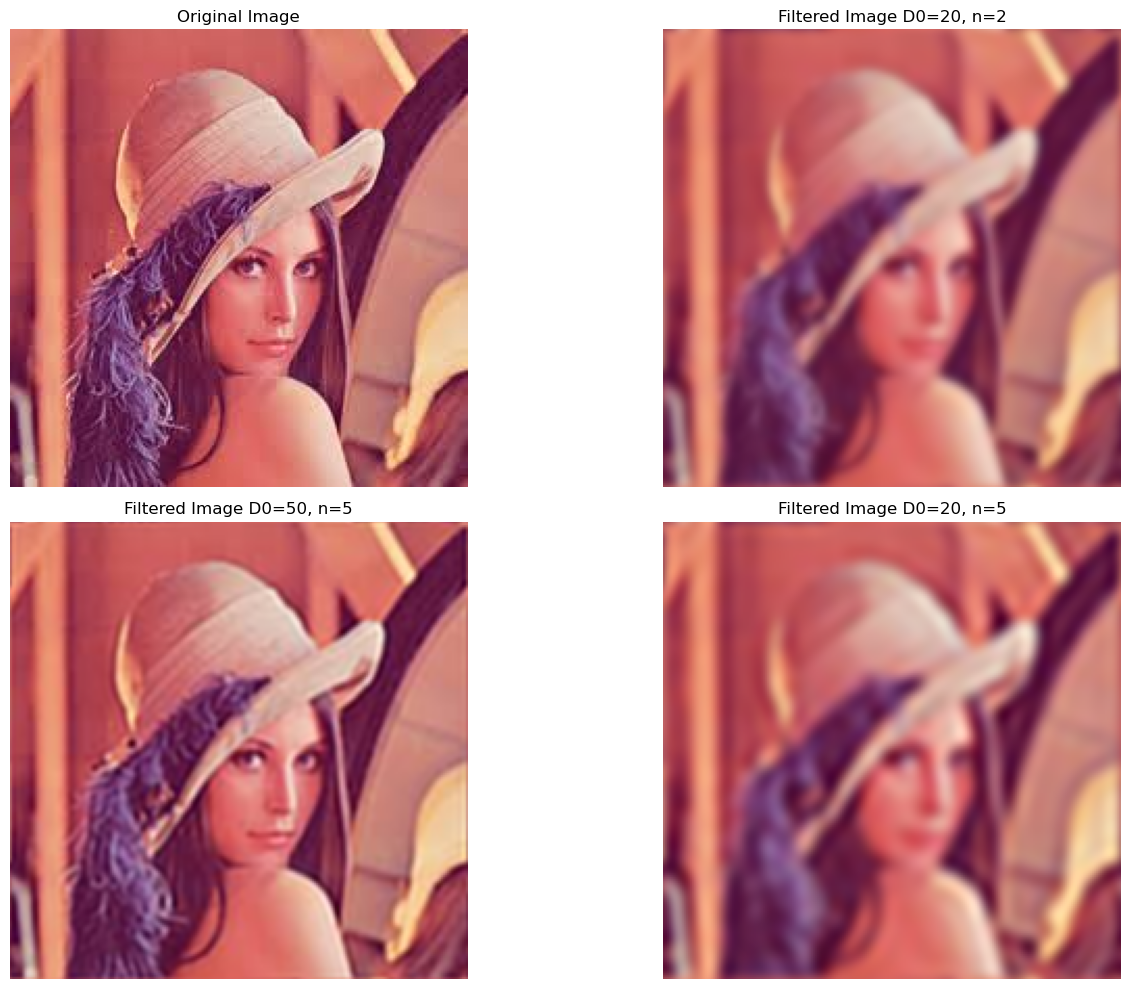

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(dims, D0, n) :
    rows, cols = dims
    r, c = np.mgrid[:rows, :cols]
    c -= cols // 2 
    r -= rows // 2
    distance = np.sqrt(c**2 + r**2)
    return 1 / (1 + (distance / D0)**(2 * n))

# Load the image 
image = cv2.cvtColor(cv2.imread(r"E:\Homework\DIP\EXP3\images\images\lena.jpg"), cv2.COLOR_BGR2RGB)

# FFT of the color image 
fshift = np.fft.fftshift(np.fft.fft2(image, axes=(0, 1)), axes=(0, 1))

# Define the filter parameters(cutoff frequencies and order of the filter)
params = [(20, 2), (50, 5), (20, 5)]

# Perform filtering
filtered_images = []

for D0, n in params:
    # Create filter mask
    filter_mask = butterworth_lowpass_filter(image.shape[:2], D0, n)
    filter_mask = filter_mask[:, :, np.newaxis]  # Expand dimensions for RGB channels

    # Apply the filter in the frequency domain
    filtered_fshift = fshift * filter_mask

    # Inverse FFT to get the filtered image back in spatial domain
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered_fshift, axes=(0, 1)), axes=(0, 1))
    img_back = np.abs(img_back) 
    img_back = np.clip(img_back, 0, 255)  # Limit pixel values between 0 and 255
    img_back = img_back.astype(np.uint8)  
    filtered_images.append(img_back)

# Plotting the results in a single figure with subplots
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.title('Original Image')
plt.axis('off')

# Filtered images
for i, img in enumerate(filtered_images):
    plt.subplot(2, 2, i + 2)
    plt.imshow(img)
    plt.title(f'Filtered Image D0={params[i][0]}, n={params[i][1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### (5) Butterworth Highpass Filter.	
(a) Load the RGB image lena.jpg.

(b) Perform FFT. (Note that when using color images, pay attention to the parameter <font style="color:red;">axes</font> of functions such as fft, ifft, fftshift and ifftshift)

(c) Design three Butterworth highpass filters with different cutoff frequencies $D_0$ and orders $n$ (cut-off frequency $D_0$ and order $n$  are free to choose).

(d) Perform frequency domain filtering with the designed Butterworth highpass filters.

(e) Obtain filtered images with IFFT.

(f) Display the original image and the filtered images in the same figure with sub-figures. Observe their differences. Add the corresponding title to the sub-figures.

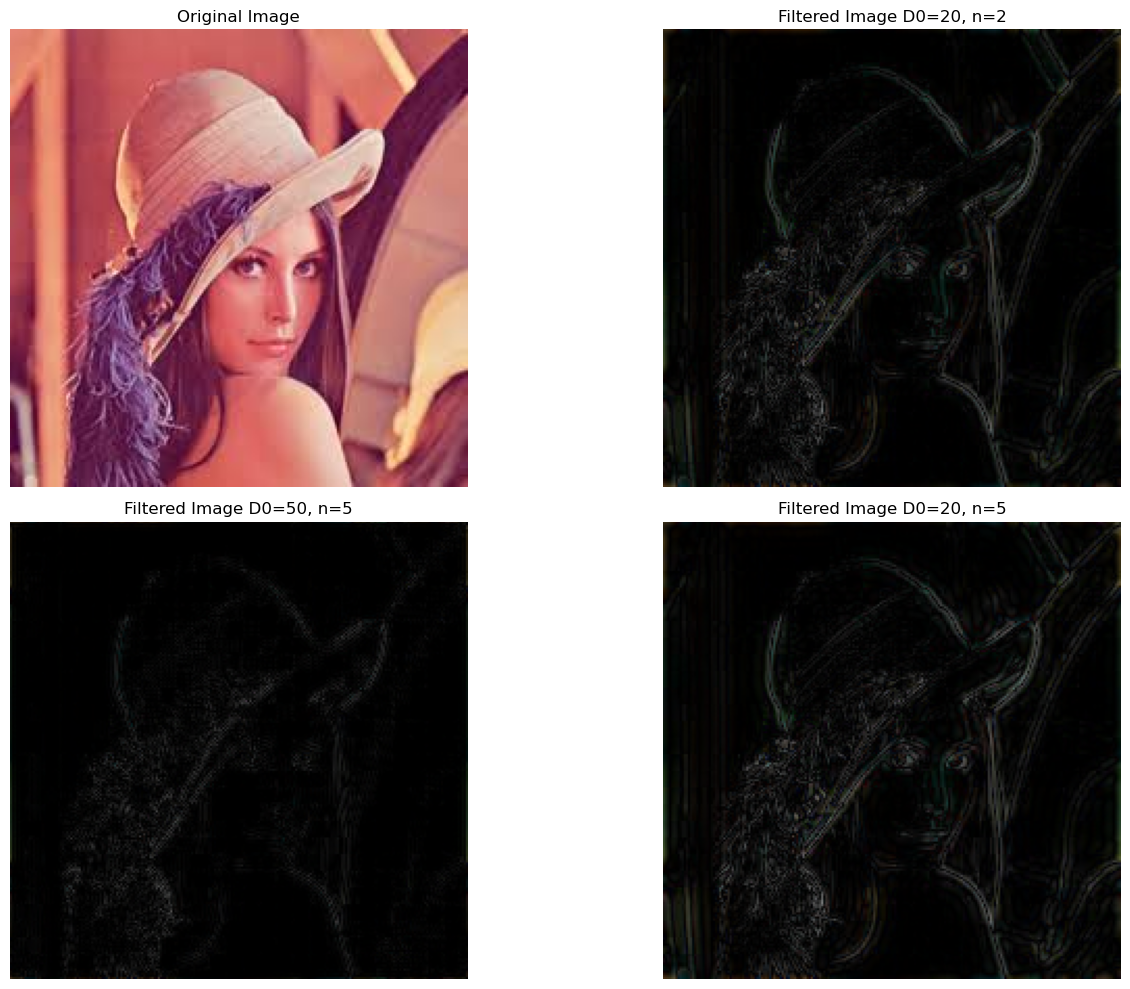

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def butterworth_lowpass_filter(dims, D0, n) :
    rows, cols = dims
    r, c = np.mgrid[:rows, :cols]
    c -= cols // 2 
    r -= rows // 2
    distance = np.sqrt(c**2 + r**2) + 1e-10 # Add a very small number to prevent miscalculations
    return 1 / (1 + (D0 / distance)**(2 * n))

# Load the image 
image = cv2.cvtColor(cv2.imread(r"E:\Homework\DIP\EXP3\images\images\lena.jpg"), cv2.COLOR_BGR2RGB)

# FFT of the color image 
fshift = np.fft.fftshift(np.fft.fft2(image, axes=(0, 1)), axes=(0, 1))

# Define the filter parameters(cutoff frequencies and order of the filter)
params = [(20, 2), (50, 5), (20, 5)]

# Perform filtering
filtered_images = []

for D0, n in params:
    # Create filter mask
    filter_mask = butterworth_lowpass_filter(image.shape[:2], D0, n)
    filter_mask = filter_mask[:, :, np.newaxis]  # Expand dimensions for RGB channels

    # Apply the filter in the frequency domain
    filtered_fshift = fshift * filter_mask

    # Inverse FFT to get the filtered image back in spatial domain
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered_fshift, axes=(0, 1)), axes=(0, 1))
    img_back = np.abs(img_back) 
    img_back = np.clip(img_back, 0, 255)  # Limit pixel values between 0 and 255
    img_back = img_back.astype(np.uint8)  
    filtered_images.append(img_back)

# Plotting the results in a single figure with subplots
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.title('Original Image')
plt.axis('off')

# Filtered images
for i, img in enumerate(filtered_images):
    plt.subplot(2, 2, i + 2)
    plt.imshow(img)
    plt.title(f'Filtered Image D0={params[i][0]}, n={params[i][1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### (6) Adaptive Median Filter.	
(a) Load the grayscale image noisy_salt_pepper.png. 

(b) Use ADAPTIVE median filter for denoising (write code based on the implementation principle of adaptive median filter).

(c) Display the original image and the filtered images in the same figure with sub-figures. Add the corresponding title to the sub-figures.


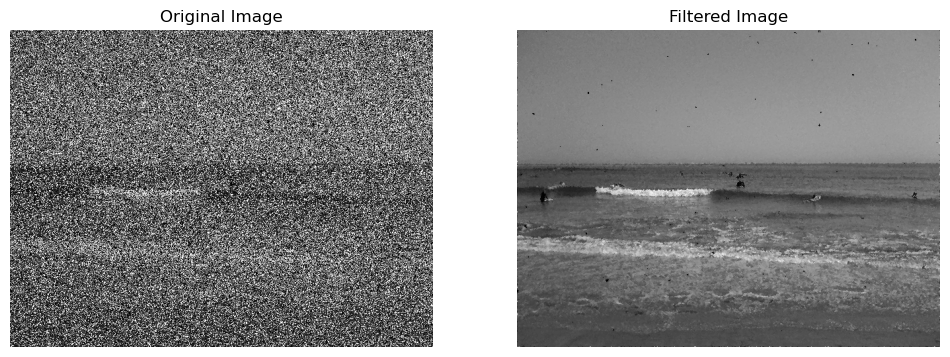

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def adaptive_median_filter(image, max_window_size = 7):
    
    # Nested function to perform median filtering with a given kernel size
    def median_filter(img, kernel_size):
        pad_size = kernel_size // 2
        # Pad the image to handle the borders
        padded_img = np.pad(img, pad_size, mode='constant', constant_values=0)
        new_img = np.zeros_like(img)
        
        # Apply median filter to each pixel in the image
        for i in range (img.shape[0]):
            for j in range(img.shape[1]):
                local_region = padded_img[i:i + kernel_size, j:j + kernel_size]
                median_val = np.median(local_region)
                new_img[i, j] = median_val
        return new_img
    
    # Copy of the original image to preserve the original data
    img = image.copy()
    rows, cols = img.shape
    filtered_image =  np.zeros_like(img)
    
    # Process each pixel in the image
    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                # Define the bounds of the window around the pixel
                start_i = max(i - window_size // 2, 0)
                end_i = min(i + window_size // 2 + 1, rows)
                start_j = max(j - window_size // 2, 0)
                end_j = min(j+ window_size // 2 + 1, cols)
                
                # Extract the window and compute its statistics
                window = img[start_i:end_i, start_j:end_j]
                med = np.median(window)
                max_val = np.max(window)
                min_val = np.min(window)
                
                # Check if the median is not the min or max value
                if min_val < med < max_val:
                    # Check if the pixel value is not an outlier
                    if min_val < img[i, j] < max_val:
                        filtered_image[i, j] = img[i, j]
                    else:
                        filtered_image[i, j] = med
                    break
                window_size += 2 
                # Fallback in case all windows fail the condition
                if window_size > max_window_size:
                    filtered_image[i, j] = med
    return filtered_image

# Load the image
image = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\noisy_salt_pepper.png", cv2.IMREAD_GRAYSCALE)

# Apply the adaptive median filter
filtered_image = adaptive_median_filter(image, max_window_size=7)

# Displaying the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()

### (7) Motion Blur, Inverse filtering and Wiener filtering.	
(a) Load the RGB image lena.jpg.

(b) Apply motion blur to it.

(c) Recovering images by using inverse filtering and Wiener filtering, respectively. (Note that when using color images, pay attention to the <font style="color:red;">axes</font> parameters of functions such as fft, ifft, fftshift and ifftshift)

(d) Add noise to the blurred image, and then use Inverse filtering and Wiener filtering to recovere the image, respectively.

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figures.

(-0.5, 219.5, 219.5, -0.5)

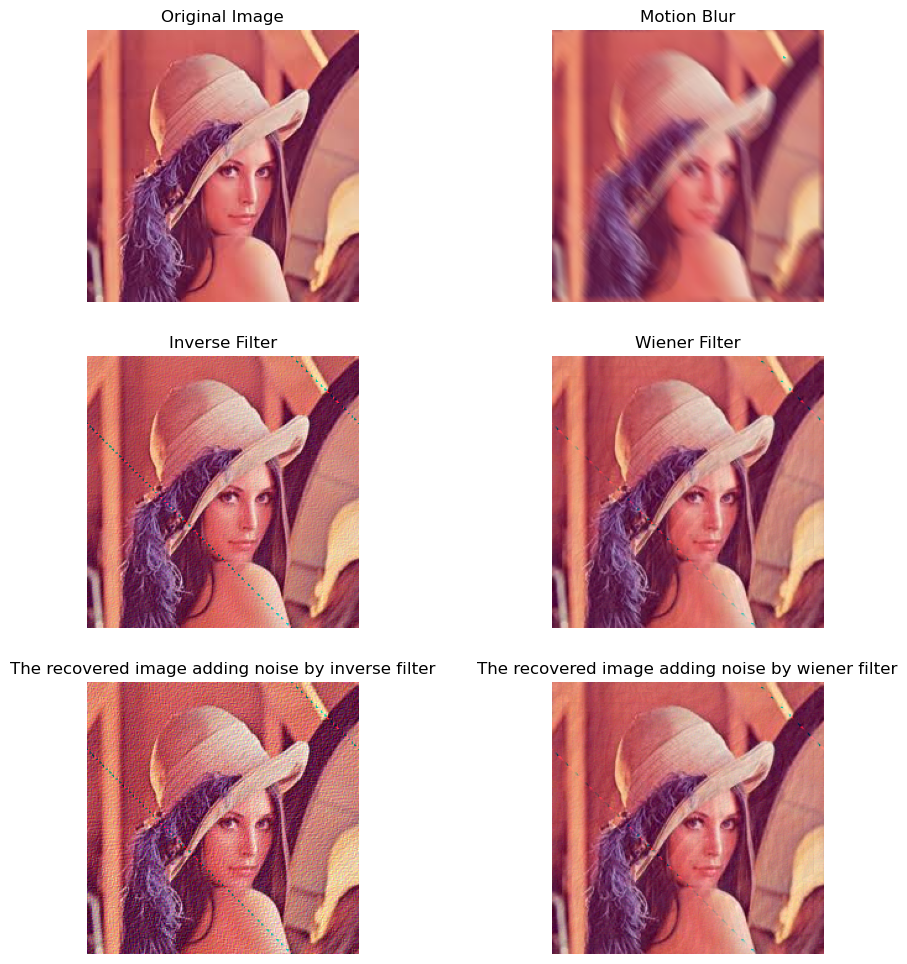

In [64]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d as conv2d
from skimage import restoration
import cv2

# Load the image 
lena = cv2.cvtColor(cv2.imread(r"E:\Homework\DIP\EXP3\images\images\lena.jpg"), cv2.COLOR_BGR2RGB)

# Write a PSF generation function.
def generate_motion_psf(kernel_size=3):
    psf = np.identity(kernel_size) / kernel_size
    return psf

# Write a function to extension psf whose shape is the same as image
def extension_psf(image, psf):
    img_h, img_w, _ = image.shape
    psf_h, psf_w = psf.shape
    psf_extension = np.zeros((img_h, img_w))
    psf_extension[((img_h-psf_h)//2-1):((img_h-psf_h)//2-1+psf_h), ((img_w-psf_w)//2-1):((img_w-psf_w)//2-1+psf_w)] = psf
    return psf_extension

# Write a function to perform motion blur
def motion_blur(image, psf_fft):
    image_fft = np.fft.fft2(image, axes=(0,1))
    image_motion_fft_channel_1 = image_fft[:,:,0]*psf_fft
    image_motion_fft_channel_2 = image_fft[:,:,1]*psf_fft
    image_motion_fft_channel_3 = image_fft[:,:,2]*psf_fft
    image_motion_fft = np.dstack([image_motion_fft_channel_1,image_motion_fft_channel_2,image_motion_fft_channel_3])
    image_motion = np.fft.ifft2(image_motion_fft, axes=(0,1))
    image_motion = np.fft.fftshift(image_motion, axes=(0,1)).real.astype(np.uint8)
    return image_motion

# Write a function to perform inverser filtering
def inverse_filter(image, psf_fft):
    image_fft = np.fft.fft2(image, axes=(0,1))
    image_fft_inverse_channel_1 = image_fft[:,:,0] / psf_fft
    image_fft_inverse_channel_2 = image_fft[:,:,1] / psf_fft
    image_fft_inverse_channel_3 = image_fft[:,:,2] / psf_fft
    image_fft_inverse = np.dstack([image_fft_inverse_channel_1,image_fft_inverse_channel_2,image_fft_inverse_channel_3])
    image_inverse = np.fft.ifft2(image_fft_inverse, axes=(0,1))
    image_inverse = np.clip(image_inverse, 0, 255)
    image_inverse = np.fft.fftshift(image_inverse, axes=(0,1)).real.astype(np.uint8)
    return image_inverse

# Write a function to perform wiener filtering
def wiener(image, psf_fft, k=1e-3):
    image_fft = np.fft.fft2(image, axes=(0,1))
    w = (np.conj(psf_fft)) / (np.abs(psf_fft)**2 + k)
    image_fft_wiener_channel_1 = w*image_fft[:,:,0]
    image_fft_wiener_channel_2 = w*image_fft[:,:,1]
    image_fft_wiener_channel_3 = w*image_fft[:,:,2]
    image_fft_wiener = np.dstack([image_fft_wiener_channel_1,image_fft_wiener_channel_2,image_fft_wiener_channel_3])
    
    image_wiener = np.fft.ifft2(image_fft_wiener, axes=(0,1))
    image_wiener = np.clip(image_wiener, 0, 255)
    image_wiener = np.fft.fftshift(image_wiener, axes=(0,1)).real.astype(np.uint8)
    return image_wiener

# Convert the PSF into frequency domain
psf = generate_motion_psf(8)
psf_extension = extension_psf(lena, psf)
psf_extension_fft = np.fft.fft2(psf_extension) + 1e-2

# Perform motion blur to lena image
lena_motion = motion_blur(lena, psf_extension_fft)

# Recovering images by using inverse filtering and Wiener filtering, respectively.

lena_motion_inverse = inverse_filter(lena_motion, psf_extension_fft)
lena_wiener = wiener(lena_motion, psf_extension_fft)

# Add noise to the blurred image
noise = 0.5 * np.random.standard_normal(lena.shape)
lena_motion_noise = lena_motion + noise

# Use Inverse filtering and Wiener filtering to recovere the image adding noise, respectively.
lena_motion_noise_inverse = inverse_filter(lena_motion_noise, psf_extension_fft)
lena_noise_wiener = wiener(lena_motion_noise, psf_extension_fft)

# Display the original lena image
plt.figure(figsize=(11,12))
plt.subplot(3, 2, 1)
plt.imshow(lena)
plt.title("Original Image")
plt.axis('off')

# Display the lena image after motion blur
plt.subplot(3, 2, 2)
plt.imshow(lena_motion)
plt.title("Motion Blur")
plt.axis('off')

# Display the recovered images by using inverse filtering
plt.subplot(3, 2, 3)
plt.imshow(lena_motion_inverse)
plt.title('Inverse Filter')
plt.axis('off')

# Display the recovered image by using wiener filtering
plt.subplot(3, 2, 4)
plt.imshow(lena_wiener)
plt.title('Wiener Filter')
plt.axis('off')

# Display the recovered images adding noise by using inverse filtering
plt.subplot(3, 2, 5)
plt.imshow(lena_motion_noise_inverse)
plt.title('The recovered image adding noise by inverse filter')
plt.axis('off')

# Display the recovered image adding noise by using wiener filtering
plt.subplot(3, 2, 6)
plt.imshow(lena_noise_wiener)
plt.title('The recovered image adding noise by wiener filter')
plt.axis('off')

### (8) Estimating Noise Parameters (Bonus Task)	
(a) Load the grayscale images noisy_1.png and noisy_2.png respectively.

(b) Select a smooth region in each image and compute the histogram to estimate the noise distribution. Please specify the noise type.

(c) Display the image and the histograms in sub-figures. Add the corresponding title.

(d) Use moment estimation to estimate the noise parameters.

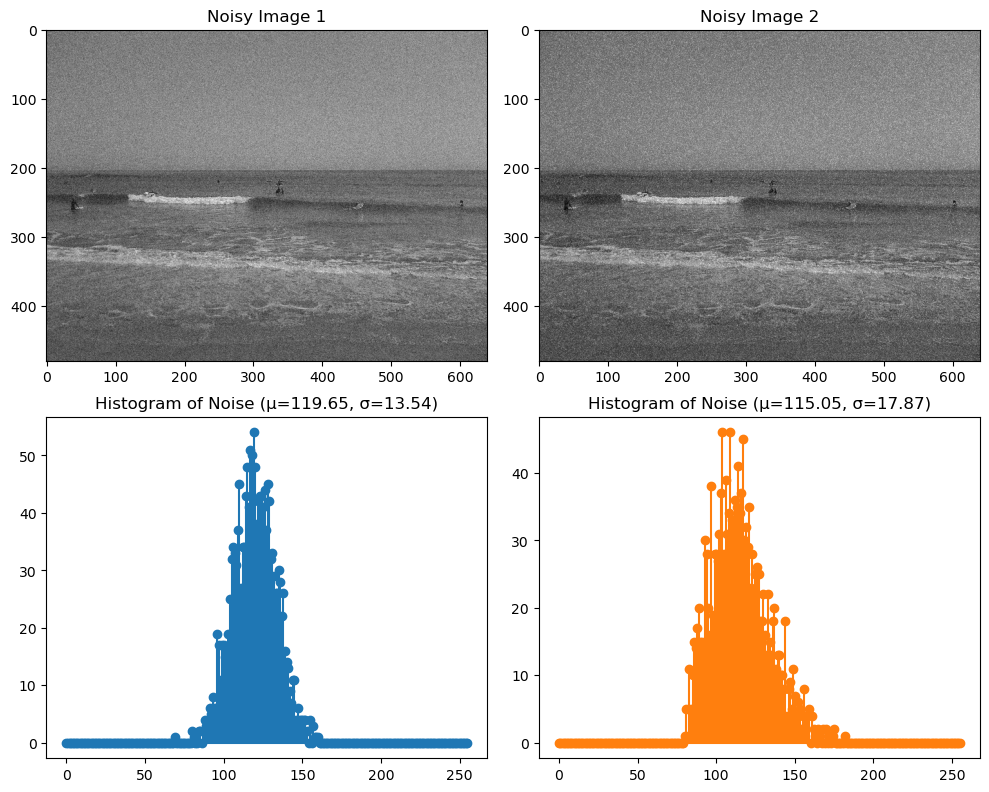

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def estimate_noise_parameters(image, roi):
    # Extracting the region of interest
    region = image[roi[0]:roi[1], roi[2]:roi[3]]
    
    # Calculate histogram of the region
    hist, bins = np.histogram(region, bins=256, range=(0, 256))
    
    # Estimate mean (mu) and standard deviation (sigma) from the ROI
    mu = np.mean(region)
    sigma = np.std(region)
    
    return mu, sigma, hist, bins

# Load the images
image1 = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\noisy_1.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(r"E:\Homework\DIP\EXP3\images\images\noisy_2.png", cv2.IMREAD_GRAYSCALE)

# Define regions of interest (ROI) for each image
# These should be manually selected based on looking at the images
roi1 = (10, 50, 10, 50)  # (row_min, row_max, col_min, col_max)
roi2 = (10, 50, 10, 50)

# Estimate noise parameters
mu1, sigma1, hist1, bins1 = estimate_noise_parameters(image1, roi1)
mu2, sigma2, hist2, bins2 = estimate_noise_parameters(image2, roi2)

# Create figure for displaying images and histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Display images and histograms
axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].set_title('Noisy Image 1')
axs[1, 0].stem(bins1[:-1], hist1, linefmt="C0-", basefmt="C0-")
axs[1, 0].set_title(f'Histogram of Noise (μ={mu1:.2f}, σ={sigma1:.2f})')

axs[0, 1].imshow(image2, cmap='gray')
axs[0, 1].set_title('Noisy Image 2')
axs[1, 1].stem(bins2[:-1], hist2, linefmt="C1-", basefmt="C1-")
axs[1, 1].set_title(f'Histogram of Noise (μ={mu2:.2f}, σ={sigma2:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.